Journey 1: 1st year PhD student 
====


## 1 Introduction

This notebook is a one of the possible journeys into HARK - the Python package designed to solve economic models with the heterogeneous agents. As it is a "journey", it is not one big tutorial, but a set of links to notebooks and other resources which will help you understand the different HARK objects and functionalities.

This journey does not require a special skill in programing. However, we recommend you take a few introductury tutorials in Python and object-oriented programing (OOP) to make you familiar with the basic concepts. Moreover, we assume some knowledge in the economic theory.

As you have found this journey, you probably have a concept of what a heterogeneous agent model is, but here is a short recap. Think about a basic infinitely lived consumer problem as you know from first-year graduate courses (letting alone the companies and general equilibrium). Using the Bellman equation, we can write it as:

\begin{eqnarray*}
V(M_t) &=& \max_{C_t} U(C_t) + \beta V(M_{t+1}), \\
& s.t. & \\
A_t &=& M_t - C_t, \\
M_{t+1} &=& R (M_{t}-C_{t}) + Y_t, \\
\end{eqnarray*}


Where $\beta <1$ is a discount factor, $C_t$ is a consumption, $A_t$ - assets, $Y_t$ - income and $U(C)$ is a standard CRRA utility function:

$$
U(C)=\frac{C^{1-\rho}}{1-\rho}
$$

Now assume that every consumer faces some uncertainty on her income (e.g. it follows AR (1) process), which is idiosyncratic - the realizations of each shock is (potentially) different for each agent. In this setting the Bellman equation looks like:

\begin{eqnarray*}
V(M_t, Y_t) &=& \max_{C_t} U(C_t) + E[\beta V(M_{t+1}, Y_{t+1})], \\
& s.t. & \\
A_t &=& M_t - C_t, \\
M_{t+1} &=& R (M_{t}-C_{t}) + Y_t, \\
\end{eqnarray*}

Therefore, finding a distribution of agent assets (consumption, savings) involves many much more advanced numerical tools than in the case of a representative agent. Obviously, this is more demanding to master. Moreover, the knowledge about involved numerical methods is less systematic, and often hard to find. It was mentioned in the HARK manual:

*"After months of effort, you may have had the character-improving experience of
proudly explaining to your adviser that not only had you grafted two ideas
together, you also found a trick that speeded the solution by an order of
magnitude, only to be told that your breathtaking insight had been understood
for many years, as reflected in an appendix to a 2008 paper; or, worse, your
discovery was something that “everybody knows” but did not exist at all in
published form!"*


HARK was designed to help you avoid similar experiences. We see two main ways how you can use this package:

- To simulate the standard heterogeneous agent models without learning all the numerical methods
- To solve your own models building-on the already implemented algorithms   

This journey will help you mostly with using HARK in the first way. We do not elaborate here the numerical methods, however in the last sections you can find some guidance which were used and how the source code is structured.      

Although using the prepared package is easier than writing your own solution (what sooner or later you will need to do if you create an original heterogeneous agent model), you still need some effort to comprehend the main classes and functionalities of HARK. We hope that this journey will make this easier! We believe that it also  will be your first step into the world of the heterogeneous agents modeling.

---
NOTE
***
We will be very happy to see your feedback. If you have any questions regarding this tutorial or HARK as a whole please see our [Github page](https://github.com/econ-ark/HARK).   

---

## 2 Before you start

As we have mentioned before, this journey does not require any special skill in programing. However, some knowledge about Python and object-oriented programing (OOP) is needed. We propose two possible ways to gather the basic concepts, however, plenty of others are available:

- Quick introduction to Python and OOP: the first three chapters from [Quantecon](https://lectures.quantecon.org/py/index_postgrad.html) should familiarize you with everything what you need for the first tutorials.
- A little longer introduction (if you want to learn something about used numerical methods):
    - Start with the basic Python [tutorial](https://docs.python.org/3/tutorial)
    - Get some knowledge about [Numpy](https://docs.scipy.org/doc/numpy/user/quickstart.html)
- You can also learn Python by learning Machine learning, as there are many tutorials constructed in that way. For example [scikit-learn tutorials](https://scikit-learn.org/stable/tutorial/index.html).   

## 3 Few words about HARK structure

HARK was written using OOP (we hope that you skimmed the tutorials and have some understanding of this). This means that different parts of the model, like different type of consumers', firms, general equilibrium conditions (if you have these components in the model) are implemented as different objects.

Such structure enables you to build your own models with different consumer type distributions / company structure (if you want some). Importantly, learning the package with a such structure implies learning the different types of objects (classes). In HARK there are two main classes: `AgentType` (think consumers, macroeconomic models) and `Market` (think general equilibrium, macro models). As AgentType objects are the attributes of the Market, we first present this type (additionally, if you are interested only in microeconomic research, you may not want to study the Market class).

However, only two classes  cannot accommodate the huge variety of the currently used models. Thus, each of the classes have subclasses and they have their own subclasses... In general more sophisticated class is a subclass. This journey will reflect this structure, by showing you first the most primitive models, then go ahead to the more fancy ones.

---
NOTE
***
In OOP objects are organized in **classes** (the general structure of the objects) and more specific **subclasses**. The subclass inherits the methods and attributes from the its parent class. Thus everything which you can do with the object from a general class can be done with the object from its subclass. Therefore, in case of the economic models the basic one are always the parent classes of the more sophisticated ones. 

---


## 4 Agent-type class 
Agent-type class enables you to build the macroeconomic models, such as presented in the introduction. It is also the essential part of the macroeconomic model in HARK. Therefore, to use HARK, you always need to use agent-type classes!

### 4.1 Introductory example
As an example, let's solve the stochastic model from the introduction. Assume the income process of the agent i in the period t: $Y_{i,t}$, is given by: 

\begin{eqnarray*} 
Y_{i,t}  &=& \varepsilon_t(\theta_{i,t} p_{i,t}) \\
p_{i,t+1} &=& p_{i,t}\psi_{i,t+1}\\
\psi_{i,t} & \sim & N(1,\sigma_{\varrho})\\
\theta_{i,t} & \sim & N(1,\sigma_{\theta})\\
\end{eqnarray*}

To get a universal solution of this problem we need to find a policy function (in this case consumption function), we can easily use the HARK solve function. Before we need to declare our model (we assume standard parametrization: R= 1.03, $\rho = 2$, $\beta = 0.96$, $P(\varepsilon=0)= 0.005$, $P(\varepsilon=1)= 0.995$, $\sigma_{\psi}= \sigma_{\theta}=0.1)$:


In [1]:
import sys #set path of the notebook 
import os
sys.path.insert(0, os.path.abspath('../../.'))
from HARK.ConsumptionSaving.ConsIndShockModel import * #import the module for the idiosyncratic shocks
#we previously defined the paramters to not bother you about it now
import Journey_1_param as Params #imported paramters 
from HARK.utilities import plotFuncs #useful function

Example = IndShockConsumerType() 


Next we can solve the model and plot the consumption function:

Consumption function


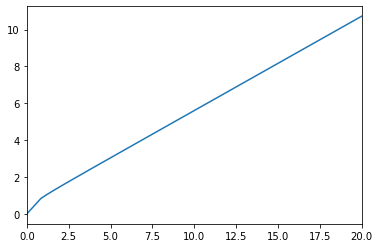

In [2]:
Example.solve()
min_v = Example.solution[0].mNrmMin #minimal value for which the consumption function is defined
max_v = 20
print("Consumption function")
plotFuncs([Example.solution[0].cFunc],min_v,max_v)


### 4.2 The Agent-Type structure
To understand the microeconomic models in HARK, you need to have some concept of the Agent-type class structure. As it was mentioned, in HARK more advanced models are subclasses of the more primitive ones. The diagram, illustrates this structure: the deterministic class $\texttt{PerfForesightConsumerType}$, is then a parent for the class of the consumers with idiosyncratic income shocks $\texttt{IndShockConsumerType}$. Next there is a class with the idiosyncratic and aggregate income shocks $\texttt{𝙼𝚊𝚛𝚔𝚘𝚟ConsumerType}$. However, it is not the end! There are subclass of the $\texttt{AggShockConsumerType}$ which are designed to be integrated with the macroeconomic models (we will discuss them in the section devoted to the Market class), as well as there are many other subclasses (which we will mention in the supplementary section).

![HARK structure](HARK_struct_2.png)


### 4.3 Main tutorials

To reflect the agent-type structure, we propose you start with the Quickstart notebook. It is devoted to the deterministic case. Then proceed to the idiosyncratic consumers and then consumers with aggregate and idiosyncratic shocks. The exact order of the suggested tutorials is given in the table.


|Number | Tutorial | Description|
| :---- |  :---- |  :---- |
|1 |[Quickstart](../notebooks/Quickstart_tutorial/Quick_start_with_solution.ipynb) |This tutorial familiarize you with the basic HARK objects and functionalities.<br /> You will learn how to create, solve, plot and simulate the deterministic<br /> microeconomic models ($\texttt{PerfForesightConsumerType}$ class).|
|2 |[Idiosyncratic consumers](../notebooks/IndShockConsumerType.ipynb) |In this tutorial you will learn how to deal<br /> with the microeconomic models with agents with idiosyncratic shocks:<br /> individual productivity shocks ($\texttt{IndShockConsumerType}$ class).  It builds on the Quickstart. | 
|3|[Nondurables during great recession](../notebooks/Nondurables-During-Great-Recession.ipynb)| Use you knowledge about HARK to conduct a few economic experiments!<br /> You will examine the effects of the uncertinity increase on the heterogenous<br /> agents with idiosyncratic income risk.|
|4|[Chinese-Growth](../notebooks/Chinese-Growth.ipynb.ipynb)|Learn how to dealt with models with idiosyncratic <br /> and aggregate risk ($\texttt{𝙼𝚊𝚛𝚔𝚘𝚟ConsumerType}$ class). <br />Next build advanced simulation with many agent types.|


### 4.4 Supplementary tutorials

The aforementioned four tutorials are the most essential ones. However, in HARK there are a few other classes, with a similar but, not-the same structure as three basic ones. Here is a list of the notebooks which familiarize you with them (if you so wish, as it is not required to understand the next topics).

|Number | Tutorial | Description|
| :---- |  :---- |  :---- |
|1* |[Kinked consumer](../notebooks/KinkedRconsumerType.ipynb) | $\texttt{KinkedRconsumerType}$ is a subclass of $\texttt{IndShockConsumerType}$. <br /> In enables to set different borrowing and lending interest rate. |
|2* |[Buffer-stock consumer](../notebooks/TractableBufferStockQuickDemo.ipynb) | In the Buffer Stock model, the unemployment state (zero income stat) is irreversible.<br /> This framework is implemented by $\texttt{TractableConsumerType}$ class.<br /> For the analytical properties of buffer stock model check this [lecture notes](http://www.econ2.jhu.edu/people/ccarroll/public/LectureNotes/Consumption/TractableBufferStock/).| 
|3*|[Generalized income process](../notebooks/IndShockConsumerType.ipynb)| In $\texttt{IndShockConsumerType}$ class, the idiosyncratic income shocks<br /> were assumed to be or purely permanent or purely transitory. In the similar class <br /> $\texttt{PersistentShockConsumerType}$ the income shocks follows AR(1) process with parameter <1,<br /> thus there are not full permanent nor transitory <br />(it was called generalized income process).|



## 5 Market class

In macroeconomic models, the consumers are only one type of agents. In such models, the economy contains also firms and a government (or other types of agents). In HARK, several standard macro models were implemented using the **Market** class and its subclasses.     



### 5.1 Introductory example

Let's extend our model from the previous section. Assume the perfect competition and Cobb-Douglas production function:

\begin{eqnarray*}
y_t = k_t^{\alpha} n_t^{1-\alpha}
\end{eqnarray*}
Thus producers' problem is:
\begin{eqnarray*}
\max_{k_t, n_t} &\: k_t^{\alpha} n_t^{1-\alpha} - (R_t +\delta)k_t-w_t n_t 
\end{eqnarray*}

Where $k_t$ is a capital, $n_t$ labour, $\delta$ is a depreciation rate.  

In this case, consumers' income is determined by the wage:

\begin{eqnarray*}
V(M_{i,t}, Y_{i,t}) &=& \max_{C_{i,t}, M_{i,t+1}} U(C_{i,t}) + E[\beta V(M_{i,t+1}, Y_{i,t+1})], \\
& s.t. & \\
A_{i,t} &=& M_{i,t} - C_{i,t}, \\
M_{i,t+1} &=& R_{t+1} (M_{i,t}-C_{i,t}) + w_{t+1} Y_{i,t+1}, \\
\end{eqnarray*}

Additionally, assume that the distribution of the consumers over capital is given by the measure $\Gamma_t$. To close the economy, there are the market clearing conditions:
\begin{eqnarray*}
n_t &= \int Y{_i,t} d \Gamma_t \\
k_{t+1} &= \int A_{i,t}^i d \Gamma_t \\
k_{t+1}+ \int C_{i,t} d\Gamma_t &= y_t+(1-\delta)k_t
\end{eqnarray*}

In HARK, you can solve this basic case by using **CobbDouglasEconomy** class. However, to add the consumers to the economy you need **AggShockConsumerType** class, which is a subclass of **IndShockConsumerType** Let's declare the economy (assuming depreciation rate $delta = 0.025$): 


In [3]:

from HARK.ConsumptionSaving.ConsAggShockModel import * #module with the economy classes

AggShockExample = AggShockConsumerType(**Params.init_agg_shocks) #declare the consumer, using the previously prepared parameters 

# Make a Cobb-Douglas economy for the agents
EconomyExample = CobbDouglasEconomy(agents=[AggShockExample], **Params.init_cobb_douglas)



Now, you can solve the economy and plot the aggregate savings function: 

capital-level steady state:  13.943289665216982


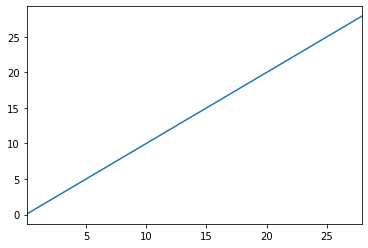

In [4]:
EconomyExample.makeAggShkHist()  # Simulate a history of aggregate shocks

# Have the consumers inherit relevant objects from the economy
AggShockExample.getEconomyData(EconomyExample)

AggShockExample.solve() #solve the model

print("capital-level steady state: ", EconomyExample.kSS) #print the capital-level steady stae

plotFuncs(AggShockExample.AFunc,0.1,2*EconomyExample.kSS) # plot the aggregate savings function


### 5.2 Market class structure

As in case of the agent-type the more complicated macroeconomic models are the subclasses of the more primitive ones. The subclasses of Market include $\texttt{CobbDouglasEconomy}$ and $\texttt{SmallOpenEconomy}$. The main difference between them is that for $\texttt{CobbDouglasEconomy}$, the capital and labour prices are endogenous, while in the (small) open economy class there are set exogenously. Nevertheless, both basic classes enable the aggregate fluctuation in the economy, that is:

\begin{eqnarray*} 
Y_{i,t}  &=& \varepsilon_t(\epsilon_{i,t}p_{i,t}\Theta_t P_t )\\
P_{t+1} &=& P_{t}\Psi_{t+1}\\
\Psi_{t}  &\sim & {N}(1,\sigma_{\Psi})\\
\Theta_t  &\sim &{N}(1,\sigma_{\Theta})\\
\end{eqnarray*}

Therefore, the consumers, which are attributes of such market classes, need to include the aggregate fluctuations of the whole economy in their optimization problem. This is the reason why the $\texttt{AggShockConsumerType}$ consumer type class (and their subclasses) must be used to construct the macro-model. 

The subclass of $\texttt{CobbDouglasEconomy}$ is $\texttt{CobbDouglasMarkovEconomy}$. In this setting, in the economy there exist an additional aggregate fluctuation, which distribution is given by the finite Markov matrix. 


![HARK_struct_2](HARK_struct_4.png)




### 5.3 Tutorial

To learn the functionalities of the market type classes in HARK we suggest to study a notebook devoted to [Krussel-Smith economy](../notebooks/KrusellSmith.ipynb). In this notebook classical [Krussell-Smith model](https://www.journals.uchicago.edu/doi/abs/10.1086/250034?journalCode=jpe) is implemented (with some extensions) using $\texttt{CobbDouglasMarkovEconomy}$ class. 

Before, you can also check the main function from [ConsAggShockModel module](https://github.com/econ-ark/HARK/blob/master/HARK/ConsumptionSaving/ConsAggShockModel.py) to see the basic steps to create the market type objects.   



#### 5.3.1 If you want to learn (a little) how the Market class works

The Market class was designed to be a general framework for many different macro models. It involves a procedure of aggregating the agents' choices: eg. aggregating consumption and savings ($\texttt{reap_vars}$ in the code) and then transforming the aggregated variables ($\texttt{mill_rule}$ n the code). 

If you would like to get better knowledge about this structure firstly look at the [Hark manual](../HARKmanual/index.html). Next, to understand how the HARK Market class works in less standard setting look at the [Fashion victim model](../notebooks/Fashion-Victim-Model.ipynb).  


## 6 If you need to study a source code

In the previous sections we showed how to solve different models using HARK. However, we know that you may also need to work with the source code for a few reasons (e.g. to learn used numerical methods, write your own code).

Obviously, working with the code, even well-written, is much more complicated tasks than just working with finished functions, and no tutorial will let you go through this painlessly. However, we hope that this partelaborating on the HARK structure and numerical methods will help you with this task. 

### 6.1 A few more words on HARK structure 
 
When you look at the [HARK](https://github.com/econ-ark/HARK) sources, you find the subdirectory called HARK. Next there is a script called "core. py". Surprisingly, you will not find this code in many of the subclasses which you learned during this journey! 

The reason for this is that HARK.core is a core of the package, a framework  for all models which can be coded in HARK. It contains the general framework of the Agent-type classes (AgentType class) and for the market. The exact structure of modules in the HARK core you can find in the [manual](../HARKmanual/index.html) in section 0.2 General Purpose Tools. For the general structure of the AgentType and Market classes also look at the manual, for the sections 0.3 and 0.4 (you can skip the examples, as you already made a lot of them in the tutorials).

Where are the subclasses which you learned during the journey? In HARK, the subclasses are in the separate directories. For the AgentType subclasses, you need to look at HARK.ConsumptionSaving directory. For example, $\texttt{PerfForesightConsumerType}$ and $\texttt{IndShockConsumerType}$ can be found in ConsIndShockModel.py. Nevertheless, if you want to understand any of the HARK modules, you firstly need to understand HARK.core. 


### 6.2 HARK solution 

For the consumer problems, solutions of the one-period consumer's problem are found using the attribute function $\texttt{solve_one_period}$. The inputs passed to this function includes also data from the subsequent periods. Before solve_one_period is called, the function pre_solve() is applied, which prepare the solution (eg. transmit the solution of the sub-sequent period as an input).

The structure of the functions which are used as solve_one_period reflects the agent-type class structures. Thus when you will study the source code, you firstly will read the solve classes. 

![Hark_struct3](HARK_struct_3.png)


#### 6.2.1 Solution method for agent problem
However, knowing the structure of the code does not be very beneficial if you do not know the solution method! While for the perfect foresight consumer it is analytic, for the stochastic consumer (thus with the idiosyncratic or the aggregate shocks) the policy functions are solved by the **endogenous grid method**.

The endogenous grid method is now widely used in the macroeconomic simulations. There are a few resources to learn it, we suggest Professor Carroll's [lecture notes](http://www.econ2.jhu.edu/people/ccarroll/SolvingMicroDSOPs/). If you prefer a very quick version, we suggest appendix to the Kruger and Kindermann [paper](https://www.nber.org/papers/w20601.pdf) (they develop a little bigger model with a different notation, but the idea is the same).

#### 6.2.2 Finding general equilibrium
In the most basic case the rational expectations general equilibrium is found by updating the agents' expectations and the aggregate choices to the point when actual aggregated variables (like intrest rate or capital) are equal to the expected ones. However, refer to the papers cited in the notebooks, to understand the exact used mathods.    


### 6.3 How to study HARK codes

We hope that this section gave you some idea how the HARK library works. However, HARK contains much more than we've discussed here. Here we give you some guidance how to continue your journey:

- Before you start make sure that you understand the endogenous grid method, and general framework structure for AgentType and Market from manual.
- Start with the HARK.core, make sure that you see the connection between the structure in the manual and the code, check autodoc from the [HARK documentation](https://hark.readthedocs.io/en/latest/generated/HARK.core.html) webpage. 
- Proceed to the ConsumptionSaving/ConsIndShockModel.py and compare the tutorials with the source code.
- Proceed to the ConsumptionSaving/ConsAggShockModel.py and compare the tutorial on the Market class with the source code, check [autodoc](https://hark.readthedocs.io/en/latest/generated/HARK.ConsumptionSaving.ConsAggShockModel.html).
- When you want to learn any of the modules, always firstly check autodoc from the [HARK documentation](https://hark.readthedocs.io/en/latest/generated/HARK.core.html) webpage.
